# Linear Regression
---

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Load the regression dataset
X_orig, y_orig = datasets.make_regression(n_samples=100, 
                                          n_features=1, 
                                          noise=25, 
                                          random_state=1)
print(f"Original X shape: {X_orig.shape}")
print(f"Original y shape: {y_orig.shape}")

# Convert to torch.tensors
X = torch.from_numpy(X_orig.astype(np.float32))
y = torch.from_numpy(y_orig.astype(np.float32))
y = y.view(y.shape[0], 1) # Reshape the tensor to contain only one column
print(f"Tensor X shape: {X.shape}")
print(f"Tensor y shape: {y.shape}")

# Parameters
n_samples, n_features = X.shape
out_size = 1
alpha = 0.01
print(f"Number of Samples: {n_samples}")
print(f"Number of Features: {n_features}")

Original X shape: (100, 1)
Original y shape: (100,)
Tensor X shape: torch.Size([100, 1])
Tensor y shape: torch.Size([100, 1])
Number of Samples: 100
Number of Features: 1


In [3]:
# Build the model
# Using a linear layer, which applies a linear transformation to the input data
model = nn.Linear(in_features=n_features, out_features=out_size)
print(f"---Initial Parameters:---\n{model.weight}\n {model.bias}")
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

---Initial Parameters:---
Parameter containing:
tensor([[0.1391]], requires_grad=True)
 Parameter containing:
tensor([-0.7848], requires_grad=True)


Epoch: 10 and Loss: 688.5594
Epoch: 20 and Loss: 642.8466
Epoch: 30 and Loss: 609.5427
Epoch: 40 and Loss: 585.2665
Epoch: 50 and Loss: 567.5624
Epoch: 60 and Loss: 554.6454
Epoch: 70 and Loss: 545.2174
Epoch: 80 and Loss: 538.3333
Epoch: 90 and Loss: 533.3052
Epoch: 100 and Loss: 529.6316
---Learned Parameters:---
Parameter containing:
tensor([[79.4239]], requires_grad=True)
Parameter containing:
tensor([5.5377], requires_grad=True)


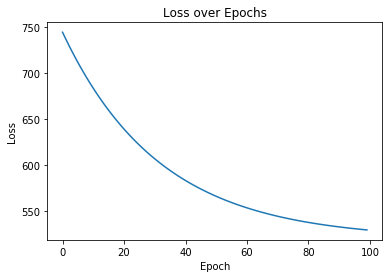

In [6]:
# Begin the training loop - Forward and Backward pass with weight updates
epochs = 100
losses = []
for epoch in range(epochs):
    # Forward
    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    # Backward pass
    loss.backward()
    # Update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1} and Loss: {loss.item():.4f}")

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
print(f"---Learned Parameters:---\n{model.weight}\n{model.bias}")

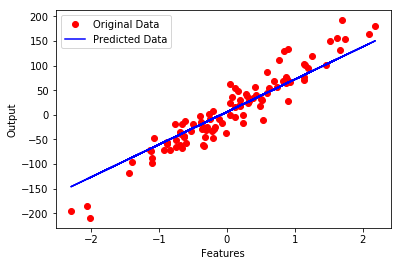

In [5]:
# Plot the results
predicted = model(X).detach().numpy() # No need to track the tensor now so detach
plt.plot(X_orig, y_orig, 'ro', label="Original Data")
plt.plot(X_orig, predicted, 'b-', label="Predicted Data")
plt.xlabel("Features")
plt.ylabel("Output")
plt.legend()
plt.show()

### Note -
- Use of **Linear** layer.
- Pytorch zero gradients and detach.
- View Vs Reshape.